In [2]:
import datasets
import pandas as pd


data = datasets.load_dataset('7Xan7der7/us_airline_sentiment')
data


/home/epsilon/Desktop/folder_0/soutenance_1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'name', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
        num_rows: 14640
    })
})

In [ ]:
df = data['train'].to_pandas()
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
name                                0
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(39)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,None,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,None,2/24/2015 11:35,None,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,None,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,None,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,None,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,None,2/24/2015 11:15,None,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,None,2/24/2015 11:14,None,Pacific Time (US & Canada)


In [ ]:
for col in df.columns:
    print(f'le pourcentage du feature : {col} est {df[col].count() / len(df) * 100}')

le pourcentage du feature : tweet_id est 100.0
le pourcentage du feature : airline_sentiment est 100.0
le pourcentage du feature : airline_sentiment_confidence est 100.0
le pourcentage du feature : negativereason est 62.714882542291626
le pourcentage du feature : negativereason_confidence est 71.91973152523799
le pourcentage du feature : airline est 100.0
le pourcentage du feature : name est 100.0
le pourcentage du feature : retweet_count est 100.0
le pourcentage du feature : text est 100.0
le pourcentage du feature : tweet_coord est 6.951578658995959
le pourcentage du feature : tweet_created est 100.0
le pourcentage du feature : tweet_location est 67.65974933223752
le pourcentage du feature : user_timezone est 67.04335319498665


In [ ]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:

cols_to_drop = [
    'tweet_id',
    'name',
    'tweet_coord',
    'tweet_created',
    'tweet_location',
    'user_timezone',
    'negativereason',             # leakage
    'negativereason_confidence',  # leakage
    'airline_sentiment_confidence' # leakage
]


df_cleaned = df.drop(columns=cols_to_drop)

df_cleaned.head(5)

,airline_sentiment,airline,retweet_count,text
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...


In [ ]:
df_cleaned.isna().sum()

airline_sentiment    0
airline              0
retweet_count        0
text                 0
dtype: int64

In [ ]:
for value in df['airline_sentiment'].unique():
    print(f'le pourcentage du classe {value} est : {len(df[df['airline_sentiment'] == value]) / len(df) * 100}')

le pourcentage du classe neutral est : 21.16978289158277
le pourcentage du classe positive est : 16.115334566125608
le pourcentage du classe negative est : 62.714882542291626


<Axes: ylabel='count'>

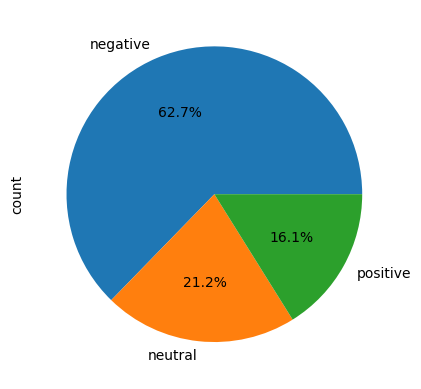

In [ ]:
df['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
def remove_stop_words(text):
    arr = text.split()
    farr = [t for t in arr if t not in stop_words]
    new_text = " ".join(farr)
    return new_text

df_cleaned['processed_text'] = df_cleaned['text'].apply(remove_stop_words)

df_cleaned['processed_text']

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus added commercials experien...
2        @VirginAmerica I today... Must mean I need tak...
3        @VirginAmerica really aggressive blast obnoxio...
4                      @VirginAmerica really big bad thing
                               ...                        
14635     @AmericanAir thank got different flight Chicago.
14636    @AmericanAir leaving 20 minutes Late Flight. N...
14637    @AmericanAir Please bring American Airlines #B...
14638    @AmericanAir money, change flight, answer phon...
14639    @AmericanAir 8 ppl need 2 know many seats next...
Name: processed_text, Length: 14601, dtype: object

In [ ]:
import nlpaug.augmenter.word as naw
import nltk
from collections import Counter

nltk.download('wordnet') 
nltk.download('omw-1.4')  
nltk.download('averaged_perceptron_tagger_eng') 


aug = naw.SynonymAug(aug_src='wordnet')

class_counts = Counter(df_cleaned['airline_sentiment'])
max_count = max(class_counts.values())

augmented_data = []

for sentiment, count in class_counts.items():
    if count < max_count:
        subset = df_cleaned[df_cleaned['airline_sentiment'] == sentiment]
        num_to_augment = max_count - count
        
        for idx in range(num_to_augment):
            row = subset.iloc[idx % len(subset)]
            augmented_text = aug.augment(row['processed_text'])
            
            augmented_data.append({
                'airline_sentiment': sentiment,
                'text': row['text'],
                'processed_text': augmented_text,
                'airline': row['airline'],
                'retweet_count': row['retweet_count']
            })

df_augmented = pd.DataFrame(augmented_data)
df_balanced = pd.concat([df_cleaned, df_augmented], ignore_index=True)

print(f"Original dataset size: {len(df_cleaned)}")
print(f"Balanced dataset size: {len(df_balanced)}")
print("\nClass distribution after augmentation:")
print(df_balanced['airline_sentiment'].value_counts())

[nltk_data] Downloading package wordnet to /home/epsilon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/epsilon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/epsilon/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Original dataset size: 14601
Balanced dataset size: 27471

Class distribution after augmentation:
airline_sentiment
neutral     9157
positive    9157
negative    9157
Name: count, dtype: int64


<Axes: ylabel='count'>

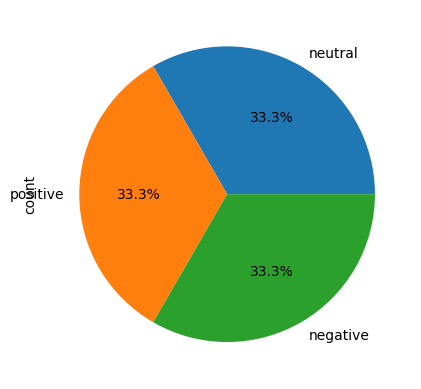

In [ ]:
df_balanced['airline_sentiment'].value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
import re
def clean_text(text):
    text = str(text) 

    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_balanced['processed_text'] = df_balanced['processed_text'].apply(clean_text)
df_balanced['processed_text']

df_balanced.to_csv('airline_centiment.csv')

In [ ]:

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2' , local_files_only=True)
embeddings = model.encode(df_balanced['processed_text'].tolist(), show_progress_bar=True)

print(embeddings)

Batches: 100%|██████████| 859/859 [00:13<00:00, 64.19it/s]



[[-0.1626136   0.29089606 -0.03911702 ... -0.29191542  0.29224786
   0.0265456 ]
 [-0.0704568  -0.2878393   0.16805393 ... -0.67656094  0.13310711
   0.19412437]
 [ 0.19095731 -0.07925105  0.29209206 ... -0.5846434  -0.29952615
  -0.35096675]
 ...
 [ 0.00720956  0.16375406  0.3081753  ... -0.20016967 -0.28440136
   0.07386139]
 [ 0.24926949  0.07942857  0.08985683 ... -0.225913   -0.15177779
  -0.00313175]
 [ 0.24089858  0.28770593 -0.00478781 ... -0.0856991  -0.40359703
   0.16606583]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_balanced['encoded_label'] = le.fit_transform(df_balanced['airline_sentiment'])
df_balanced

,airline_sentiment,airline,retweet_count,text,processed_text,encoded_label
0,neutral,Virgin America,0,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn said,1
1,positive,Virgin America,0,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...,2
2,neutral,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,virginamerica i today must mean i need take an...,1
3,negative,Virgin America,0,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0
4,negative,Virgin America,0,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0
...,...,...,...,...,...,...
27466,positive,American,0,@AmericanAir my boss is :),americanair hirer,2
27467,positive,American,0,@AmericanAir Your response has been incredible...,americanair your answer unbelievable truly am...,2
27468,positive,American,0,@AmericanAir Thanks guys got some sleep. Hang ...,americanair thanks guys got sleep bent dfw ba...,2
27469,positive,American,0,@AmericanAir great thank you,americanair capital thank,2


In [ ]:
import chromadb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = df_balanced.drop(columns=['encoded_label']) 
client = chromadb.PersistentClient(path="./chromadb")

full_indices = np.arange(len(df_balanced))

train_indices, test_indices = train_test_split(
    full_indices,
    test_size=0.2,
    random_state=42,
    stratify=df_balanced['encoded_label']
)


train_ids_list = [str(i) for i in train_indices]
train_embeddings_list = embeddings[train_indices].tolist()
train_document_list = df_balanced.iloc[train_indices]['processed_text'].tolist()
train_encoded_labels_list = df_balanced.iloc[train_indices]['encoded_label'].tolist()
train_metadatas_list = [{'label': label} for label in train_encoded_labels_list]


test_ids_list = [str(i) for i in test_indices]
test_embeddings_list = embeddings[test_indices].tolist()
test_document_list = df_balanced.iloc[test_indices]['processed_text'].tolist()
test_encoded_labels_list = df_balanced.iloc[test_indices]['encoded_label'].tolist()
test_metadatas_list = [{'label': label} for label in test_encoded_labels_list]



def batch_insert(collection_name, ids_list, embeddings_list, document_list, metadatas_list, batch_size=5000):
    collection = client.get_or_create_collection(collection_name)
    total_data = len(ids_list)

    for i in range(0, total_data, batch_size):
        i_end = min(i + batch_size, total_data)

        collection.add(
            ids=ids_list[i:i_end],
            embeddings=embeddings_list[i:i_end],
            documents=document_list[i:i_end],
            metadatas=metadatas_list[i:i_end]
        )

In [ ]:
batch_insert(
    "sentiment_train",
    train_ids_list,
    train_embeddings_list,
    train_document_list,
    train_metadatas_list
)


batch_insert(
    "sentiment_test",
    test_ids_list,
    test_embeddings_list,
    test_document_list,
    test_metadatas_list
)

In [ ]:
train_collection = client.get_collection("sentiment_train")
test_collection = client.get_collection("sentiment_test")

train_data = train_collection.get(
    include=['embeddings', 'metadatas', 'documents']
)
test_data = test_collection.get(
    include=['embeddings', 'metadatas', 'documents']
)

train_data.keys()


dict_keys(['ids', 'embeddings', 'documents', 'uris', 'included', 'data', 'metadatas'])

In [ ]:
train_embeddings = train_data['embeddings']


train_metadatas = train_data['metadatas']

y_train = [meta['label'] for meta in train_metadatas]

y_train = np.array(y_train)
X_train = np.array(train_embeddings)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import pandas as pd
import numpy as np
import time
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')


models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=2000), 
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],        
            'solver': ['saga'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [200],
            'max_depth': [20, 30], 
            'min_samples_split': [5],
            'min_samples_leaf': [2],   
            'class_weight': ['balanced', 'balanced_subsample']
        }
    },
    
    'SVM': {
        'model': SVC(random_state=42, cache_size=1000),
        'params': {
            'C': [1, 10],
            'kernel': ['rbf'],     
            'class_weight': ['balanced']
        }
    }
}


X = np.array(test_data['embeddings'])
y = np.array([meta['label'] for meta in test_data['metadatas']])

In [ ]:
import warnings
from tqdm import tqdm

warnings.filterwarnings('ignore')
X_test = np.array(test_data['embeddings'])
y_test = np.array([meta['label'] for meta in test_data['metadatas']])

results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model_info in tqdm(models.items(), desc="Training Progress"):
    print(f"\n{'='*60}")
    print(f"Training: {model_name}")
    print(f"{'='*60}")
    
    grid_search = GridSearchCV(
    estimator=model_info['model'],
    param_grid=model_info['params'],
    cv=cv,
    scoring='f1_macro',   
    n_jobs=-1,
    verbose=2
)
    
    grid_search.fit(X_train, y_train)
    
    results.append({
        'Model': model_name,
        'Best CV Score': grid_search.best_score_,
        'Best Parameters': grid_search.best_params_
    })
    
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    
    test_score = grid_search.score(X_test, y_test)
    print(f"Test balanced accuracy: {test_score:.4f}")

print(f"\n{'='*60}")
print("SUMMARY OF ALL MODELS")
print(f"{'='*60}")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Best CV Score', ascending=False)
print(results_df.to_string(index=False))

best_model = results_df['Model'].values[0]
best_score = results_df['Best CV Score'].values[0]
print(f"\n🏆 Best Model: {best_model}")
print(f"   CV Score: {best_score:.4f}")

Training Progress:   0%|          | 0/3 [00:00<?, ?it/s]


Training: Logistic Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   2.8s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.0s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.2s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, penalty=l2, solver=saga; total time=   3.7s
[CV] END C=1, class_weight=balanced, penalty=l2, solver=saga; total time=   8.9

Training Progress:  33%|███▎      | 1/3 [00:32<01:05, 32.71s/it]


Best parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
Best CV score: 0.7537
Test balanced accuracy: 0.7603

Training: Random Forest
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END class_weight=balanced_subsample, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END class_weight=balanced_subsample, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END class_weight=balanced_subsample, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END class_weight=balanced_subsample, max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total t

Training Progress:  67%|██████▋   | 2/3 [02:17<01:15, 75.29s/it]


Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.7507
Test balanced accuracy: 0.8311

Training: SVM
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.0min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.0min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.1min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.1min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.1min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.1min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.2min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.2min
[CV] END .............C=1, class_weight=balanced, kernel=rbf; total time= 2.4min
[CV] END ..

Training Progress: 100%|██████████| 3/3 [07:14<00:00, 144.96s/it]

Test balanced accuracy: 0.9069

SUMMARY OF ALL MODELS
              Model  Best CV Score                                                                                                   Best Parameters
                SVM       0.844632                                                            {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
Logistic Regression       0.753658                                           {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
      Random Forest       0.750734 {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

🏆 Best Model: SVM
   CV Score: 0.8446


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import joblib  


best_model_name = results_df.iloc[0]['Model']
best_params = results_df.iloc[0]['Best Parameters']

print(f"raining {best_model_name} with parameters: {best_params}")


final_model = models[best_model_name]['model']


final_model.set_params(**best_params)


final_model.fit(X_train, y_train)




y_pred = final_model.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))


model_filename = 'best_airline_sentiment_model.pkl'
joblib.dump(final_model, model_filename)

print(f"model saved as '{model_filename}'")


raining SVM with parameters: {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
classification report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1989
           1       0.87      0.92      0.89      2217
           2       0.91      0.93      0.92      2217

    accuracy                           0.91      6423
   macro avg       0.91      0.91      0.91      6423
weighted avg       0.91      0.91      0.91      6423

model saved as 'best_airline_sentiment_model.pkl'
classification report:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      1989
           1       0.87      0.92      0.89      2217
           2       0.91      0.93      0.92      2217

    accuracy                           0.91      6423
   macro avg       0.91      0.91      0.91      6423
weighted avg       0.91      0.91      0.91      6423

model saved as 'best_airline_sentiment_model.pkl'


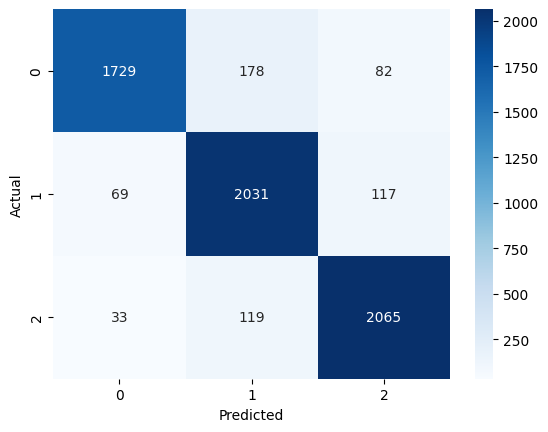

Balanced Accuracy: 0.906


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = final_model.predict(X_test)



cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


from sklearn.metrics import balanced_accuracy_score
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.3f}")

In [ ]:

y_test

array([1, 0, 1, ..., 1, 2, 2], shape=(6423,))

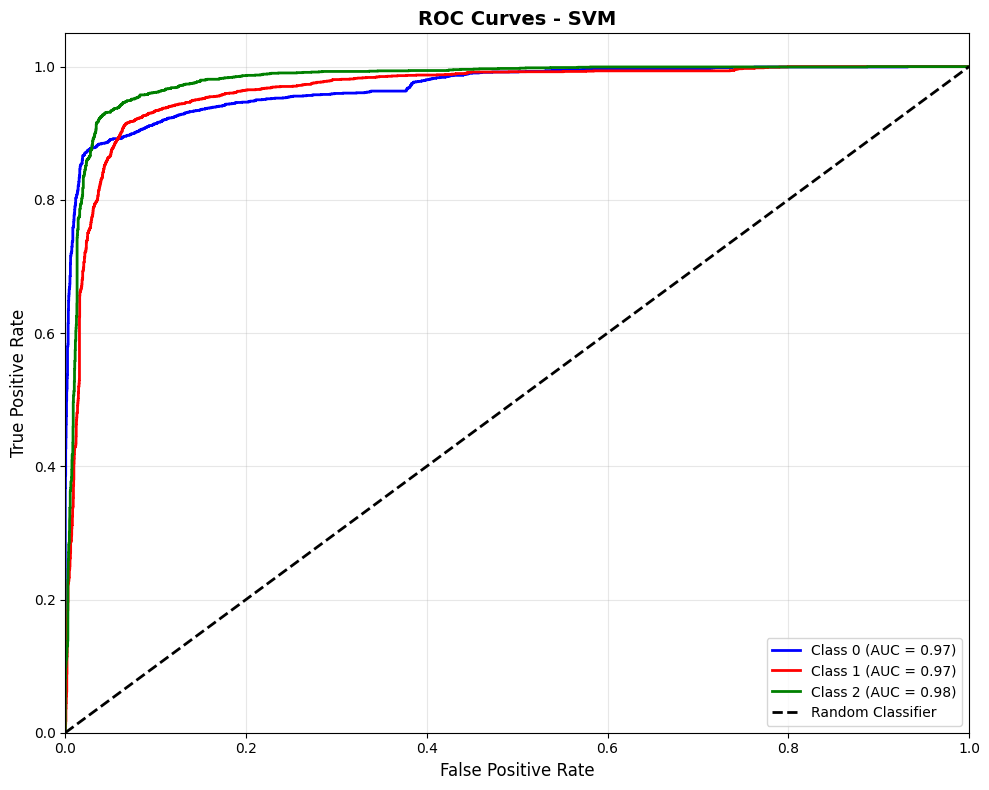


AUC Scores:
  Class 0: 0.9692
  Class 1: 0.9655
  Class 2: 0.9801

Macro-average AUC: 0.9716


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_train)
n_classes = len(classes)


y_score = final_model.decision_function(X_test)



y_test_bin = label_binarize(y_test, classes=classes)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(10, 8))

colors = ['blue', 'red', 'green', 'orange', 'purple']
for i, color in zip(range(n_classes), colors[:n_classes]):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'ROC Curves - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAUC Scores:")
for i in range(n_classes):
    print(f"  Class {classes[i]}: {roc_auc[i]:.4f}")
    
macro_auc = np.mean([roc_auc[i] for i in range(n_classes)])
print(f"\nMacro-average AUC: {macro_auc:.4f}")